# 모두를 위한 딥러닝
## Lab-07-5 Fashion MNIST introduction

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from IPython.display import Image

print(tf.__version__)

2.7.0


* Tensorflow의 keras에서 제공하는 fashon_mnist 데이터를 불러온다. train data와 test data를 가져와 Class_names을 정해주어 vector로 바꾸어준다(0~9)

In [18]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

불러온 Fashion MNIST Data를 확인한다. python은 0부터 시작하니 4번째 배열에 있는 이미지를 불러온다.

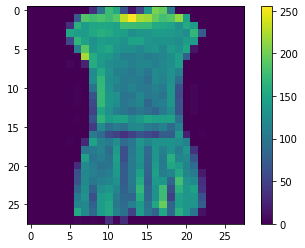

In [19]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

* train data image의 사이즈가 255이다. 이를 정규화(0 ~ 1 값으로 변환)하기 위해 255로 나누어 주어 데이터를 만들어준다. x_train에는 60,000개의 이미지가 있고, 그 이미지는 28x28 크기이다. y_train에는 x_train의 60,000개에 대한 값으로 0~9 값이 담겨있는 레이블 데이터 셋이다. 그리고 test_images는 10,000개의 이미지와 레이블 데이터셋이다.

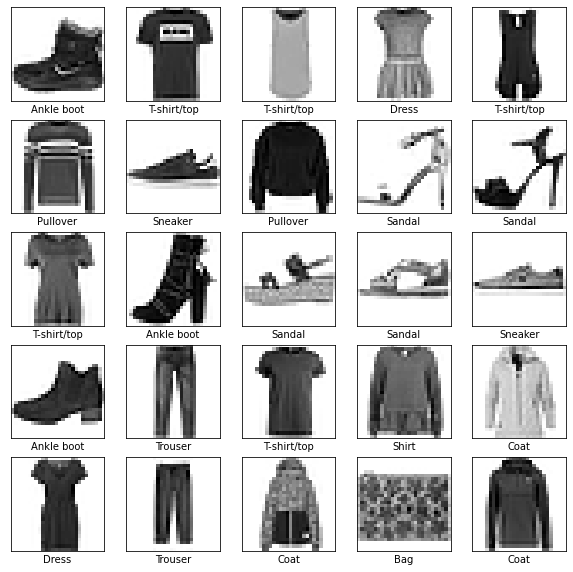

In [20]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

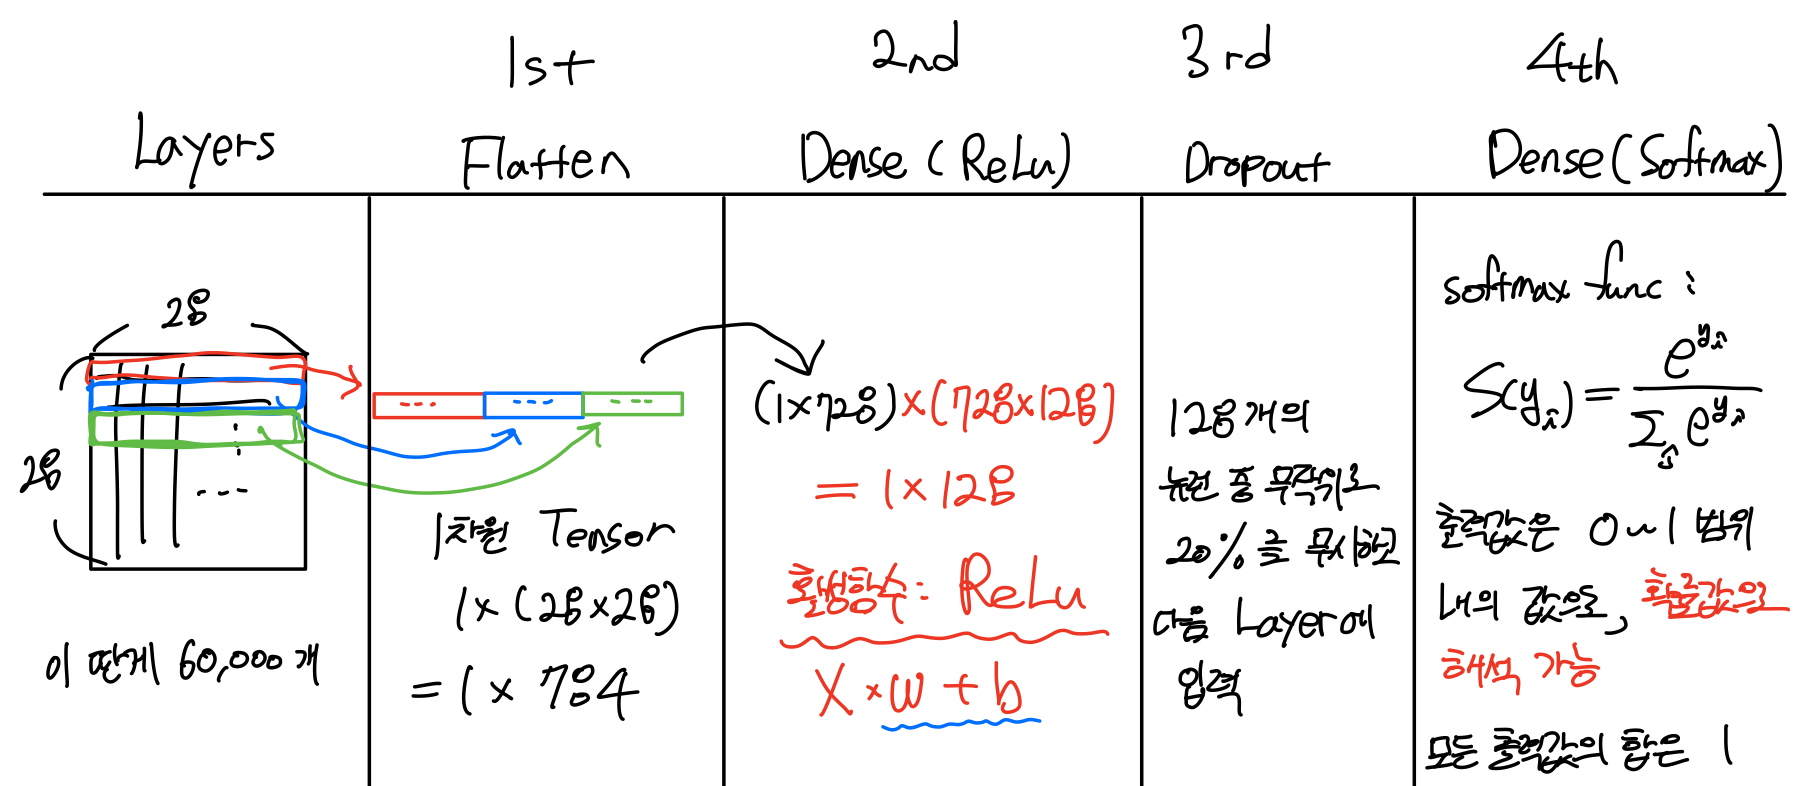

In [21]:
Image("Lab-07/Lab07-5.png")

* 모델의 학습 중에 역전파를 통한 가중치 최적화를 위한 기울기 방향에 대한 경사하강을 위한 방법으로 Adam을 사용했으며 손실함수로 다중 분류의 Cross Entropy Error인 ‘sparse_categorical_crossentropy’를 지정하였습니다. 그리고 모델 평가를 위한 평가 지표로 ‘accuracy’를 지정하였습니다. 이제 다음처럼 모델을 학습할 수 있습니다.

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0755 - accuracy: 0.6615
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6364 - accuracy: 0.7713
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5615 - accuracy: 0.7985
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5201 - accuracy: 0.8156
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4927 - accuracy: 0.8256


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.5114 - accuracy: 0.8189
Test accuracy: 0.8188999891281128
